In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다
pd.set_option('display.max_columns', None) # 모든 열 출력
plt.rcParams['axes.unicode_minus'] = False

In [2]:
KP2020 = pd.read_csv('data/spbd/KP2020.csv',encoding='cp949')
KP2021 = pd.read_csv('data/spbd/KP2021.csv',encoding='cp949')
NPA2020 = pd.read_csv('data/spbd/NPA2020.csv',encoding='cp949')

## KP2020 : 2020년 12월 data

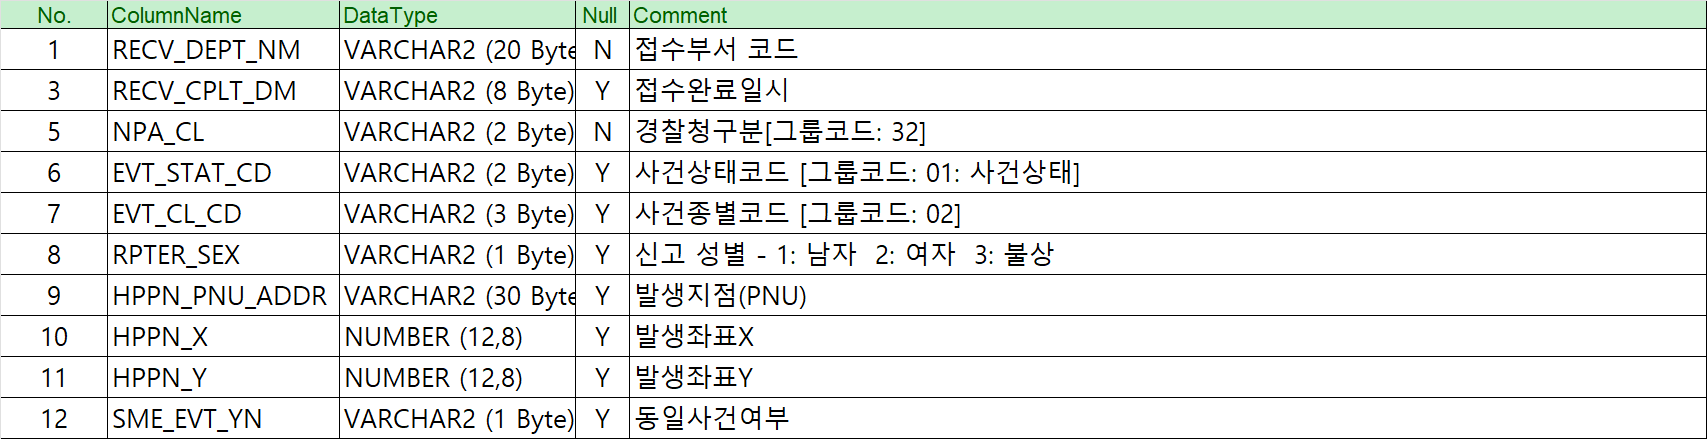

+ 401(교통사고) : 6207
+ 402(교통불편) : 1294
+ 403(교통위반) : 516
+ 404(사망, 대형사고) : 0
+ 405(인피도주(뺑소니)) : 1
+ 406(음주운전) : 1325

In [3]:
KP2020.head(1)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y


In [4]:
KP2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77077 entries, 0 to 77076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   77077 non-null  object 
 1   RECV_CPLT_DM   77077 non-null  object 
 2   NPA_CL         77077 non-null  int64  
 3   EVT_STAT_CD    77077 non-null  int64  
 4   EVT_CL_CD      77077 non-null  int64  
 5   RPTER_SEX      74658 non-null  float64
 6   HPPN_PNU_ADDR  47805 non-null  object 
 7   HPPN_X         60313 non-null  float64
 8   HPPN_Y         60313 non-null  float64
 9   SME_EVT_YN     13442 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.9+ MB


In [5]:
# 사건종별코드 401(교통사고)
KP2020[KP2020['EVT_CL_CD']==401].shape

(6207, 10)

In [6]:
# 사건종별코드 402(교통불편)
KP2020[KP2020['EVT_CL_CD']==402].shape

(1294, 10)

In [7]:
# 사건종별코드 403(교통위반)
KP2020[KP2020['EVT_CL_CD']==403].shape

(516, 10)

In [8]:
# 사건종별코드 404(사망, 대형사고)
KP2020[KP2020['EVT_CL_CD']==404].shape

(0, 10)

In [9]:
# 사건종별코드 405(인피도주(뺑소니))
KP2020[KP2020['EVT_CL_CD']==405].shape

(1, 10)

In [10]:
# 사건종별코드 406(음주운전)
KP2020[KP2020['EVT_CL_CD']==406].shape

(1325, 10)

In [11]:
KP2020_401 = KP2020[KP2020['EVT_CL_CD']==401]

In [12]:
KP2020_403 = KP2020[KP2020['EVT_CL_CD']==403]

In [13]:
KP2020_401.RECV_CPLT_DM.sort_values()

250      20/12/01 00:09:52.000000000
177      20/12/01 00:09:52.000000000
151      20/12/01 00:12:30.000000000
180      20/12/01 00:22:16.000000000
158      20/12/01 01:06:14.000000000
                    ...             
75430    20/12/31 23:13:17.000000000
75289    20/12/31 23:14:38.000000000
74224    20/12/31 23:30:04.000000000
74294    20/12/31 23:35:35.000000000
74415    20/12/31 23:44:11.000000000
Name: RECV_CPLT_DM, Length: 6207, dtype: object

## KP2021 : 21.01 ~ 23.01 데이터

+ 401(교통사고) : 164582
+ 402(교통불편) : 37443
+ 403(교통위반) : 24295
+ 404(사망, 대형사고) : 16
+ 405(인피도주(뺑소니)) : 35
+ 406(음주운전) : 51955

In [14]:
KP2021.head(1)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y


In [15]:
KP2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594060 entries, 0 to 2594059
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RECV_DEPT_NM   object 
 1   RECV_CPLT_DM   object 
 2   NPA_CL         int64  
 3   EVT_STAT_CD    int64  
 4   EVT_CL_CD      int64  
 5   RPTER_SEX      float64
 6   HPPN_PNU_ADDR  object 
 7   HPPN_X         float64
 8   HPPN_Y         float64
 9   SME_EVT_YN     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 197.9+ MB


In [16]:
# 사건종별코드 401(교통사고)
KP2021[KP2021['EVT_CL_CD']==401].shape

(164582, 10)

In [17]:
# 사건종별코드 402(교통불편)
KP2021[KP2021['EVT_CL_CD']==402].shape

(37443, 10)

In [18]:
# 사건종별코드 403(교통위반)
KP2021[KP2021['EVT_CL_CD']==403].shape

(24295, 10)

In [19]:
# 사건종별코드 404(사망, 대형사고)
KP2021[KP2021['EVT_CL_CD']==404].shape

(16, 10)

In [20]:
### 사건종별코드 405(인피도주(뺑소니))
KP2021[KP2021['EVT_CL_CD']==405].shape

(35, 10)

In [21]:
# 사건종별코드 406(음주운전)
KP2021[KP2021['EVT_CL_CD']==406].shape

(51955, 10)

In [22]:
KP2021_401 = KP2021[KP2021['EVT_CL_CD']==401]

In [23]:
KP2021_403 = KP2021[KP2021['EVT_CL_CD']==403]

In [24]:
KP2021_401.RECV_CPLT_DM.sort_values()

2079       21/01/01 00:04:22.000000000
2095       21/01/01 00:07:41.000000000
2060       21/01/01 00:08:40.000000000
2103       21/01/01 00:12:30.000000000
2132       21/01/01 00:16:19.000000000
                      ...             
2575276    23/01/18 22:48:29.000000000
2571695    23/01/18 22:50:32.000000000
2576124    23/01/18 23:09:09.000000000
2576391    23/01/18 23:32:32.000000000
2576570    23/01/18 23:34:30.000000000
Name: RECV_CPLT_DM, Length: 164582, dtype: object

## NPA2020 : 20.01 ~ 20.11 데이터

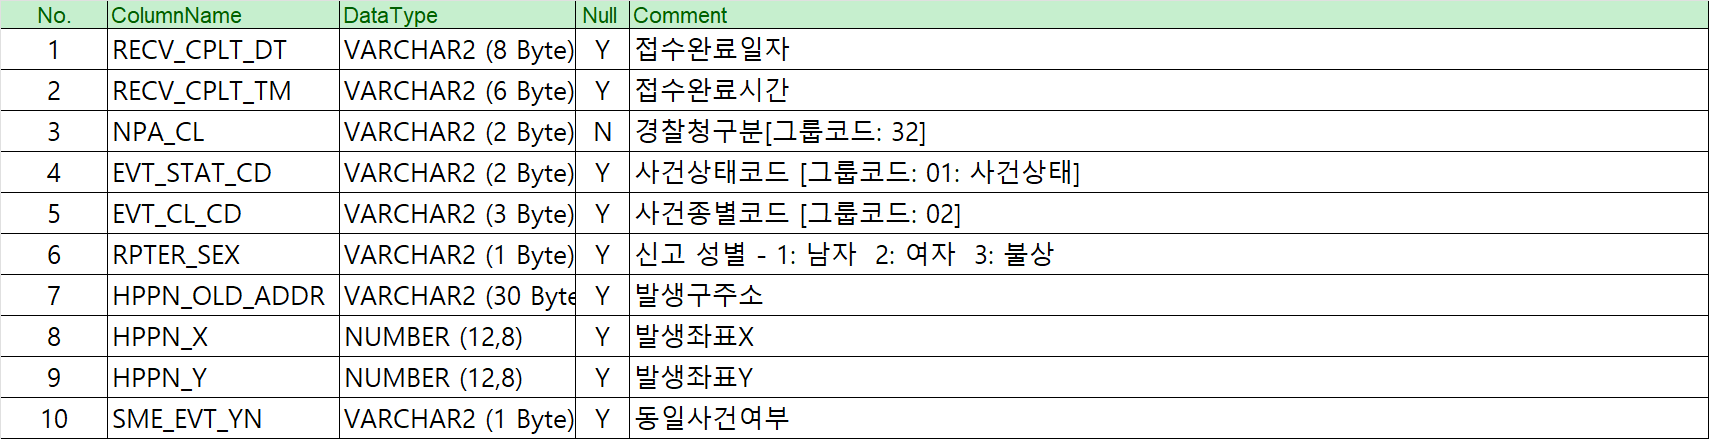

+ 401(교통사고) : 93659
+ 402(교통불편) : 21359
+ 403(교통위반) : 11088
+ 404(사망, 대형사고) : 7
+ 405(인피도주(뺑소니)) : 16
+ 406(음주운전) : 16799

In [25]:
NPA2020.head(1)

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.40927,36.33301,Y


In [26]:
NPA2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178244 entries, 0 to 1178243
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   RECV_CPLT_DT   1178244 non-null  int64  
 1   RECV_CPLT_TM   1178244 non-null  int64  
 2   NPA_CL         1178244 non-null  int64  
 3   EVT_STAT_CD    1178244 non-null  int64  
 4   EVT_CL_CD      1178244 non-null  int64  
 5   RPTER_SEX      1178244 non-null  object 
 6   HPPN_OLD_ADDR  919651 non-null   object 
 7   HPPN_X         1076591 non-null  float64
 8   HPPN_Y         1076591 non-null  float64
 9   SME_EVT_YN     581443 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 89.9+ MB


In [27]:
# 사건종별코드 401(교통사고)
NPA2020[NPA2020['EVT_CL_CD']==401].shape

(93659, 10)

In [28]:
# 사건종별코드 402(교통불편)
NPA2020[NPA2020['EVT_CL_CD']==402].shape

(21359, 10)

In [29]:
# 사건종별코드 403(교통위반)
NPA2020[NPA2020['EVT_CL_CD']==403].shape

(11088, 10)

In [30]:
# 사건종별코드 404(사망, 대형사고)
NPA2020[NPA2020['EVT_CL_CD']==404].shape

(7, 10)

In [31]:
# 사건종별코드 405(인피도주(뺑소니))
NPA2020[NPA2020['EVT_CL_CD']==405].shape

(16, 10)

In [32]:
# 사건종별코드 406(음주운전)
NPA2020[NPA2020['EVT_CL_CD']==406].shape

(16799, 10)

In [33]:
NPA2020_401 = NPA2020[NPA2020['EVT_CL_CD']==401]

In [34]:
NPA2020_403 = NPA2020[NPA2020['EVT_CL_CD']==403]

In [35]:
NPA2020_401.RECV_CPLT_DT.sort_values()

54         20200101
2510       20200101
2519       20200101
2553       20200101
2558       20200101
             ...   
1174701    20201121
1178086    20201122
1178035    20201122
1178051    20201122
1178173    20201122
Name: RECV_CPLT_DT, Length: 93659, dtype: int64

### 연도별 교통사고 건수 비교
+ 2020년 : NPA2020_401 + KP2020_401
+ 2021년 : KP2021_401 중에 2021년만 select
+ 2022년 : KP2021_401 중에 2022년만 select

In [36]:
NPA2020_401.shape[0] + KP2020_401.shape[0]

99866

In [37]:
a = KP2021_401[KP2021_401['RECV_CPLT_DM'] < '22/01/01']
b = KP2021_401[('22/01/01' <= KP2021_401['RECV_CPLT_DM']) & (KP2021_401['RECV_CPLT_DM']< '23/01/01')]

In [38]:
a.shape[0]

77738

In [39]:
b.shape[0]

83015

### 연도별 교통위반 건수 비교

In [40]:
NPA2020_403.shape[0] + KP2020_403.shape[0]

11604

In [41]:
c = KP2021_403[KP2021_403['RECV_CPLT_DM'] < '22/01/01']
d = KP2021_403[('22/01/01' <= KP2021_403['RECV_CPLT_DM']) & (KP2021_403['RECV_CPLT_DM']< '23/01/01')]

In [42]:
c.shape[0]

11539

In [43]:
d.shape[0]

12300